In [1]:
import mysql.connector

remote = mysql.connector.connect(
    host = "database-1.cba44miw26by.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "cwh",
    password = "0000",
    database = "pig"
)

In [2]:
cur = remote.cursor()

In [3]:
import urllib.request # urllib = URL 처리를 위한 파이썬 패키지
import pandas as pd
import json

profit_per_df = pd.read_excel('../data/profit_per_pig.xlsx')
profit_per_df.head()

/home/wonho/project/eda-repo-4/.venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,비목별,2015,2015.1,2015.2,2015.3,2015.4,2016,2016.1,2016.2,2016.3,...,2022,2022.1,2022.2,2022.3,2022.4,2023,2023.1,2023.2,2023.3,2023.4
0,비목별,"1,000두미만","1,000~1,999두","2,000~2,999두","3,000두이상",평균,"1,000두미만","1,000~1,999두","2,000~2,999두","3,000두이상",...,"1,000두미만","1,000~1,999두","2,000~2,999두","3,000두이상",평균,"1,000두미만","1,000~1,999두","2,000~2,999두","3,000두이상",평균
1,총수입(A),408487,406374,414533,400066,404220,394242,384362,386526,380085,...,444118,448600,457206,448777,449828,437380,454198,453249,442907,446514
2,일반비(B),324881,305275,287385,286718,293658,338136,302566,304032,273379,...,423297,392596,372823,362148,374563,425830,414823,416874,382799,398092
3,비용합계(C),355424,323013,300088,296252,307077,370138,318897,316286,282701,...,465382,418036,392127,374547,393089,476096,446943,442953,403280,423855
4,소득(A-B),83606,101099,127148,113348,110562,56106,81796,82494,106706,...,20821,56004,84383,86629,75265,11550,39375,36375,60108,48422


In [4]:
profit_per_df.columns = profit_per_df.columns.str.replace(r'\.\d+', '', regex=True)
profit_per_df = profit_per_df.transpose()
profit_per_df.head()

,0,1,2,3,4,5
비목별,비목별,총수입(A),일반비(B),비용합계(C),소득(A-B),순수익(A-C)
2015,"1,000두미만",408487,324881,355424,83606,53063
2015,"1,000~1,999두",406374,305275,323013,101099,83361
2015,"2,000~2,999두",414533,287385,300088,127148,114445
2015,"3,000두이상",400066,286718,296252,113348,103814


In [5]:
profit_per_df.columns = profit_per_df.iloc[0]
profit_per_df = profit_per_df[1:]
profit_per_df.head()

비목별,비목별,총수입(A),일반비(B),비용합계(C),소득(A-B),순수익(A-C)
2015,"1,000두미만",408487,324881,355424,83606,53063
2015,"1,000~1,999두",406374,305275,323013,101099,83361
2015,"2,000~2,999두",414533,287385,300088,127148,114445
2015,"3,000두이상",400066,286718,296252,113348,103814
2015,평균,404220,293658,307077,110562,97143


In [6]:
profit_per_df_mean = profit_per_df[profit_per_df['비목별'] == '평균']
profit_per_df_mean

비목별,비목별,총수입(A),일반비(B),비용합계(C),소득(A-B),순수익(A-C)
2015,평균,404220,293658,307077,110562,97143
2016,평균,382972,288565,301273,94407,81699
2017,평균,406600,307836,321006,98764,85594
2018,평균,371698,309075,323298,62623,48400
2019,평균,329564,307997,323225,21567,6339
2020,평균,362028,299302,315079,62726,46949
2021,평균,407665,324757,339629,82908,68036
2022,평균,449828,374563,393089,75265,56739
2023,평균,446514,398092,423855,48422,22659


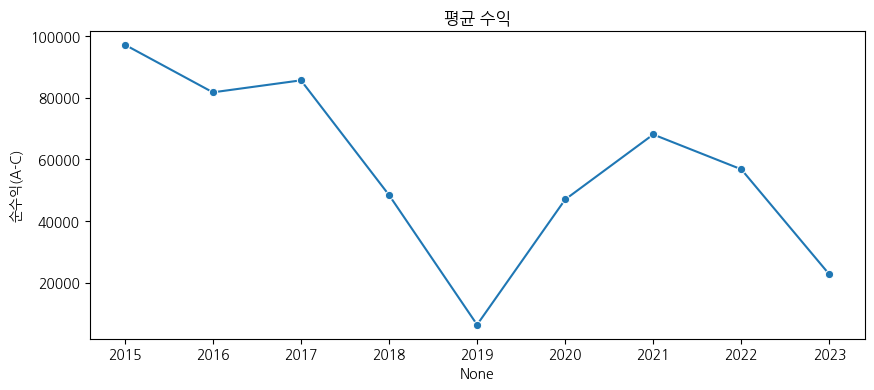

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

plt.figure(figsize=(10, 4))
sns.lineplot(x=profit_per_df_mean.index, y=profit_per_df_mean['순수익(A-C)'].astype(int), marker='o')
plt.title('2019년부터 평균 수익')
plt.xlim(left=profit_per_df_mean.loc['2019':].index[0])
plt.show()

In [8]:
cur.execute("SELECT * FROM disease_number")

disease_number_result = cur.fetchall()
disease_number_result

[(2019, 14, 3), (2020, 2, 0), (2021, 5, 0), (2022, 7, 0), (2023, 10, 11)]

In [9]:
import pandas as pd

disease_number_df = pd.DataFrame(disease_number_result)
disease_number_df.columns = ['year', 'africa', 'gujaeyeok']
disease_number_df  

,year,africa,gujaeyeok
0,2019,14,3
1,2020,2,0
2,2021,5,0
3,2022,7,0
4,2023,10,11


In [12]:
disease_number_df = disease_number_df.astype(int)
disease_number_df

,year,africa,gujaeyeok
0,2019,14,3
1,2020,2,0
2,2021,5,0
3,2022,7,0
4,2023,10,11


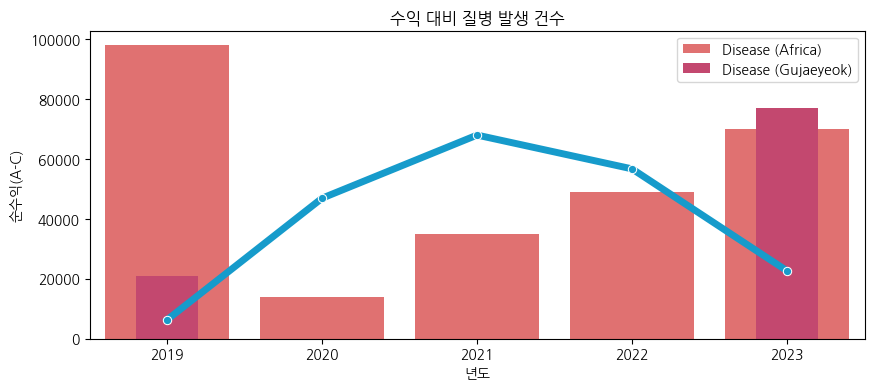

In [38]:
plt.figure(figsize=(10, 4))
sns.lineplot(x=profit_per_df_mean.loc['2019':].index, y=profit_per_df_mean.loc['2019':]['순수익(A-C)'].astype(int), color='#169BCB', marker='o', linewidth=5)
sns.barplot(x=disease_number_df['year'].astype(str), y=disease_number_df['africa'].astype(int) * 7000, color='#F35E5E', label='Disease (Africa)')
sns.barplot(x=disease_number_df['year'].astype(str), y=disease_number_df['gujaeyeok'].astype(int) * 7000, color='#D73467', label='Disease (Gujaeyeok)', width=0.4, dodge=True)
plt.title('수익 대비 질병 발생 건수')
plt.xlabel('년도')
plt.show()

In [ ]:
# 숫자형으로 변환
profit_per_df = profit_per_df.apply(pd.to_numeric, errors='coerce')

# 비목별에서 겹치는 항목을 합쳐 평균 계산
profit_per_df_mean = profit_per_df.groupby(profit_per_df.index).mean()

profit_per_df_mean

In [ ]:
profit_per_df_mean = profit_per_df_mean.astype(int)
profit_per_df_mean[-1ee]

In [ ]:
for row in profit_per_df_mean.itertuples():
    cur.execute(f"""
                    INSERT INTO
                        profit_per_pig
                    VALUES ('{row[0]}', {row[1]}, {row[2]}, {row[3]}, {row[4]}, {row[5]}) 
                """)
    print(row[0], row[1], row[2], row[3], row[4], row[5])

In [ ]:
remote.commit() 

In [ ]:
cur.close()
remote.close()